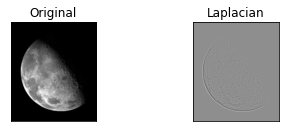

In [17]:
# question 1

import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img0 = cv2.imread('image1.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# Applying laplician 
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# Applying on edges
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
# Question 2

import cv2
import numpy as np
 
# reading image
img = cv2.imread('image1.jpg',0)
 
# Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
laplacian = cv2.Laplacian(blur,cv2.CV_64F)


# localize the edge towards the brighter side
laplacian1 = laplacian/laplacian.max()



def Zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    
    # count the number of positive and negative pixels in the neighborhood
    
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
 
 
            # If both negative and positive values exist in the pixel neighborhood, then that pixel is a  potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            #
            # difference with the pixel
 
            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
   
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image
 
cv2.imshow('Question2',laplacian1)
cv2.waitKey(0)

-1

In [19]:
# Question 3

from math import log10, sqrt 
import cv2 
import numpy as np 
  
def SNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 10 * log10(max_pixel / mse) 
    return snr 
  
def main(): 
     original = cv2.imread("image1.jpg") 
     compressed = cv2.imread("image2.jpg", 1) 
     value = PSNR(original, compressed) 
     print(f"SNR value is {value} ") 
       
if __name__ == "__main__": 
    main() 

SNR value is 100 


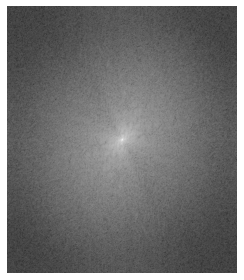

In [54]:
# Question 4

import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('image1.jpg', 0).astype(np.float32) / 255
fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
shifted = np.fft.fftshift(fft, axes=[0, 1])
magnitude = cv2.magnitude(shifted[:, :, 0], shifted[:, :, 1])
magnitude = np.log(magnitude)

plt.axis('off')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()
plt.show()



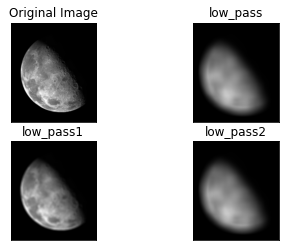

In [14]:
#question 6

import cv2
import matplotlib.pyplot as plt


def main():
    
    
    img = cv2.imread('image1.jpg', 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
    low_pass = cv2.boxFilter(img, -1, (53, 53))
    
    #box1 = cv2.boxFilter(img, -1, (53, 53))
    
    low_pass1 = cv2.blur(img, (13, 13))
    
    low_pass2 = cv2.GaussianBlur(img, (37, 37), 0)
    
    titles = ['Original Image', 'low_pass', 
              'low_pass1', 'low_pass2']

    outputs = [img, low_pass, low_pass1, low_pass]
    
    
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(outputs[i])
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

if __name__ == "__main__":
    main()

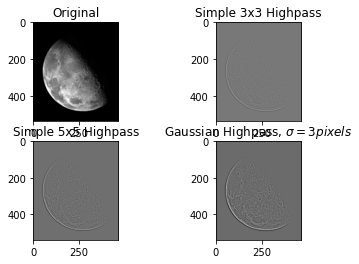

In [62]:
#question 5

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage


def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the image
im = Image.open('image1.jpg')
data = np.array(im, dtype=float)
plot(data, 'Original')


kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')


kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')


lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')

plt.show()